In [5]:
import pandas as pd
import fpsnippets as fp
import numpy as np
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt

# Importing dataset
fire = pd.read_csv("fire incidents.csv", sep=",", low_memory=False)
nbhInfo = pd.read_csv("neighborhoods.csv", sep=",", low_memory=False)

# gets neighborhoods in column of 'fire incidents'
neighborhoods_in_fire = fire['neighborhood'].unique()

# Filter rows in 'nbhInfo' where the hood is not in 'neighborhoods_in_fire'
nbhInfo_filtered = nbhInfo[nbhInfo['hood'].isin(neighborhoods_in_fire)]

# Update 'nbhInfo' to contain only the rows with neighborhoods present in 'fire incidents'
nbhInfo = nbhInfo_filtered

# Dictionaries for fire incident count and squaremilage of each neighborhood
fireCount = dict()
squareMiles = dict()

# Here I am counting the fire incidents per neighborhood
fire_counts_per_neighborhood = fire['neighborhood'].value_counts().to_dict()

# updating the fire count dictionary
fireCount.update(fire_counts_per_neighborhood)

#Manually combined duplicate neighborhood under two names.
fireCount['Mt. Oliver'] += fireCount['Mount Oliver Borough']
del fireCount['Mount Oliver Borough']

#square miles per neighborhoood
for index, row in nbhInfo.iterrows():
        squareMiles[row['hood']] = row['sqmiles']

#Making sure it all works
print("Everything is set up.")


Everything is set up.


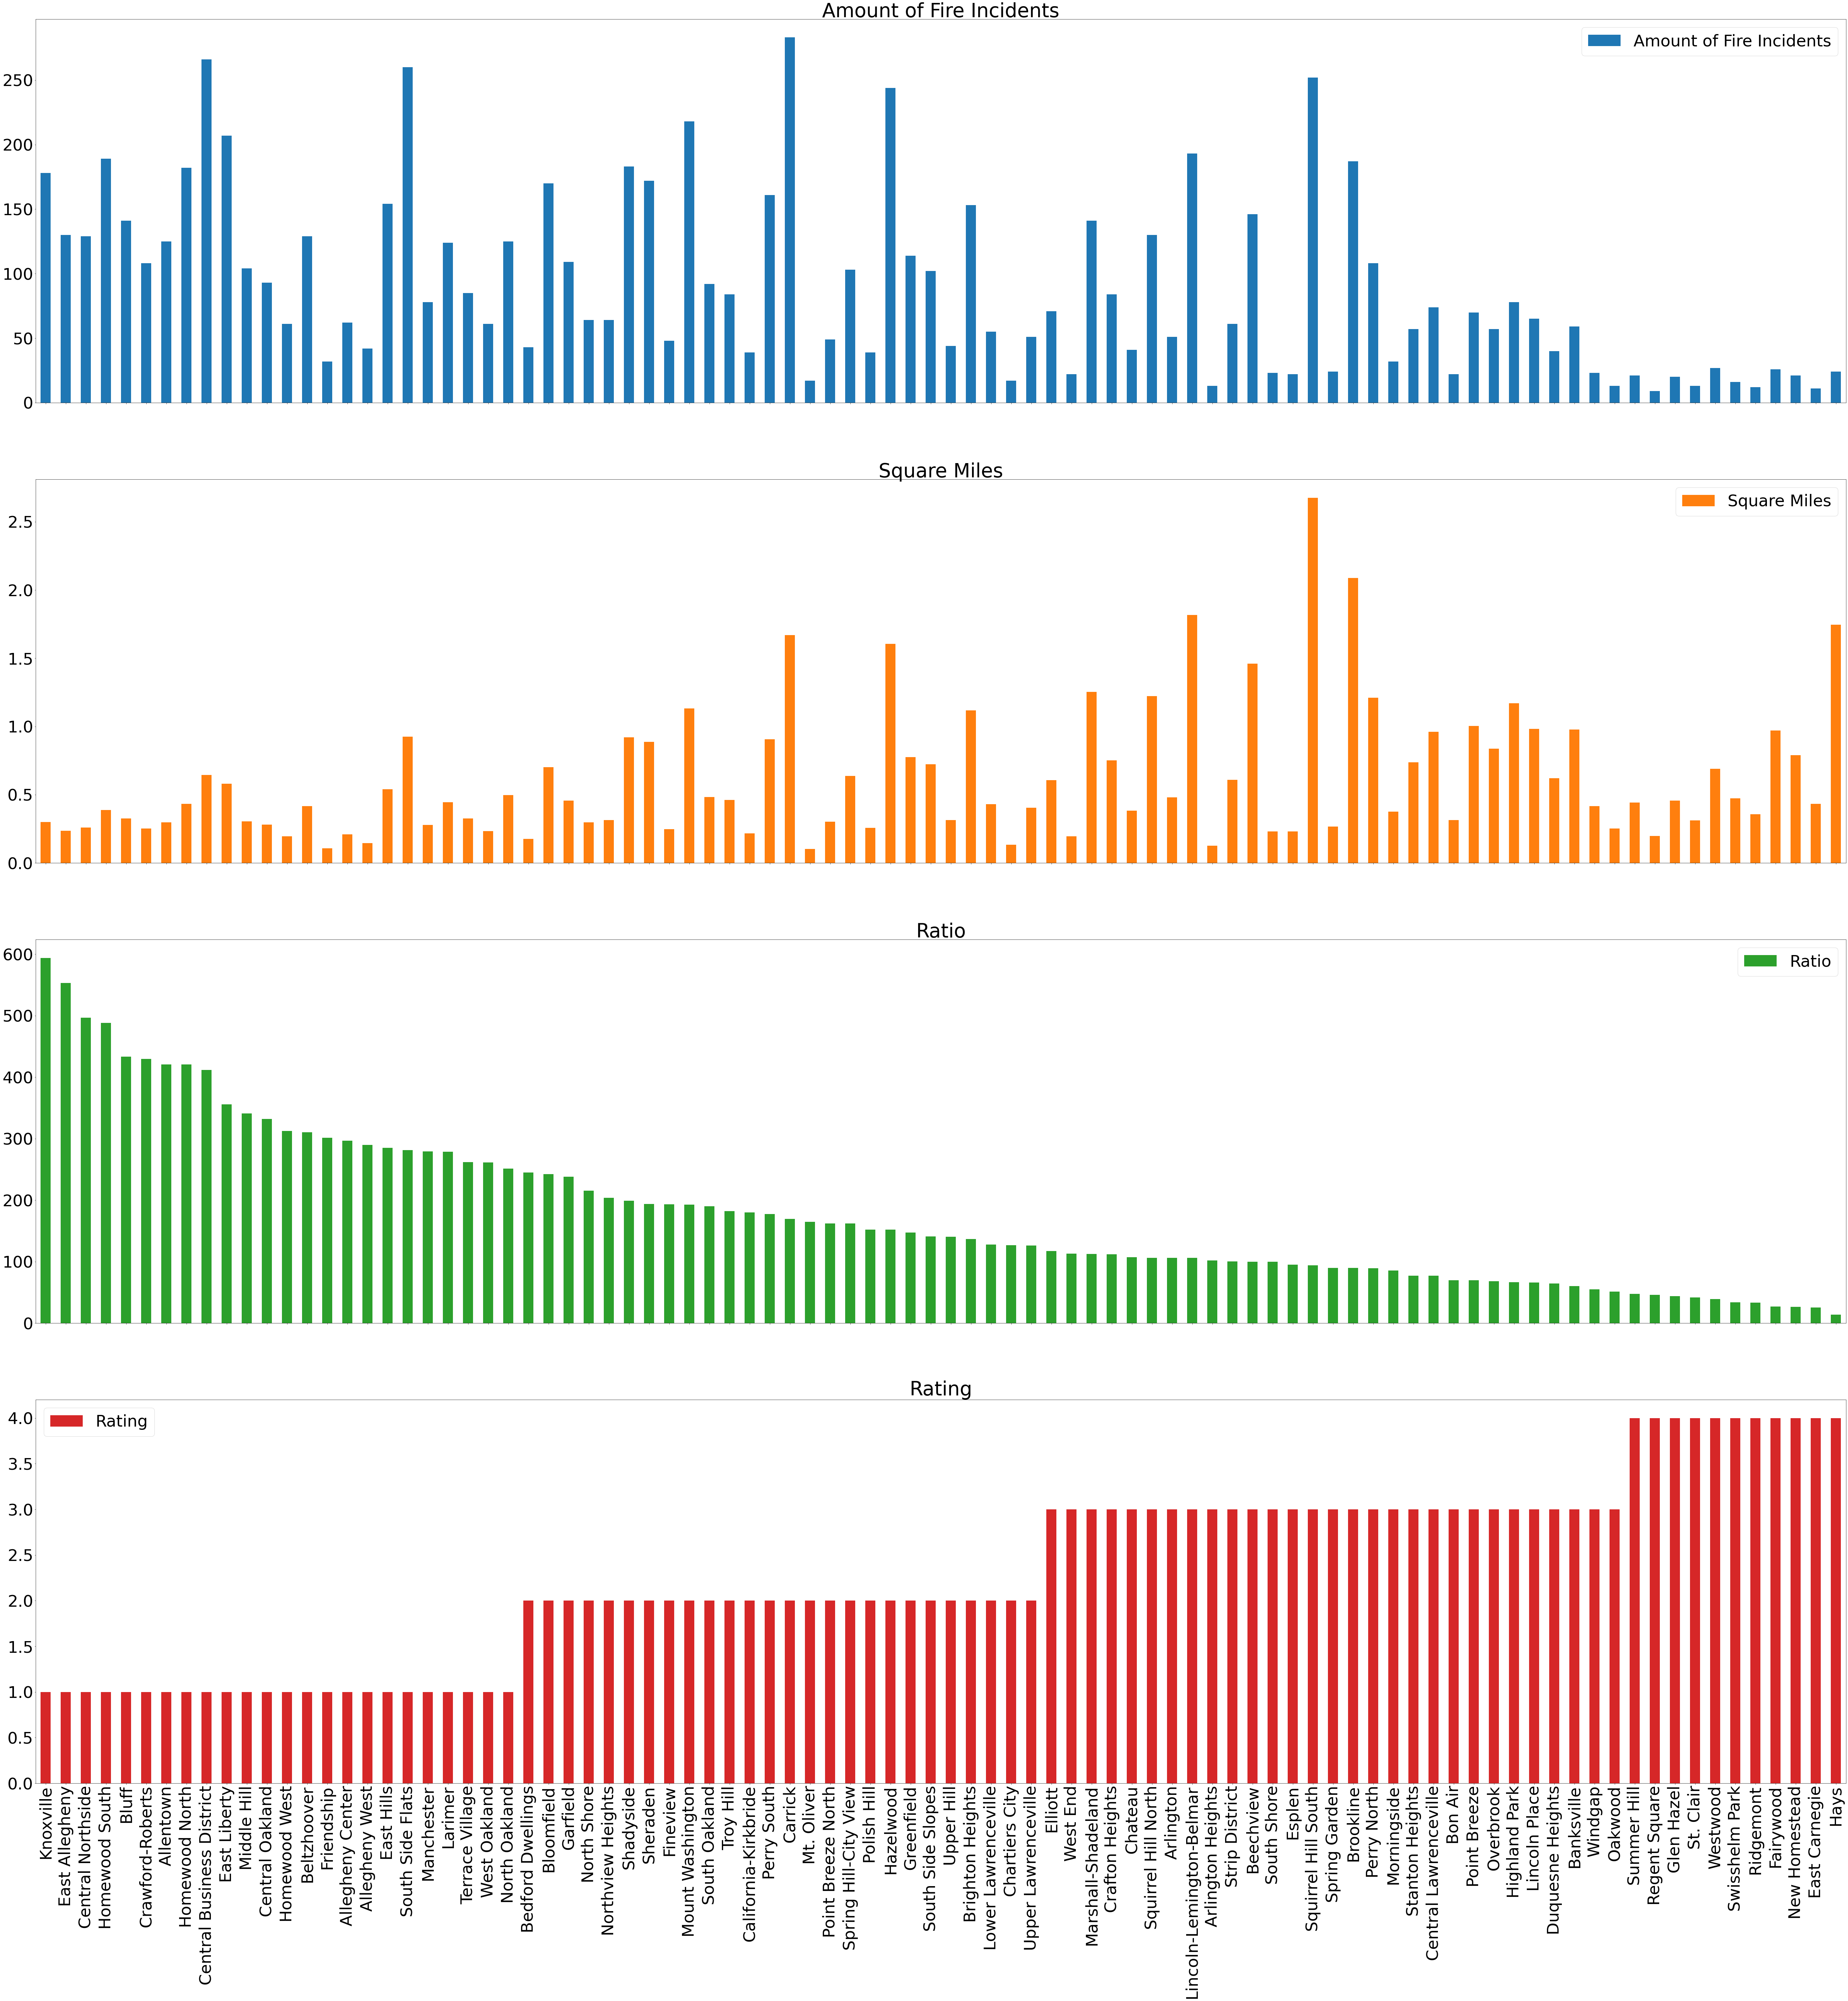

In [8]:
#Adjusting font size like my group member did
plt.rcParams.update({'font.size': 50})

#The final dataframe
incidents = pd.Series(fireCount).sort_values(ascending=False).to_frame()

#Columns for each data
incidents.columns =['Amount of Fire Incidents']
incidents['Square Miles'] = ''
incidents['Ratio'] = ''
incidents['Rating'] = ''

#Neigborhood names to title case for consistency
incidents.index = incidents.index.str.title()
squareMiles = {key.title(): value for key, value in squareMiles.items()}


for index, row in incidents.iterrows():
    # Retrieve the square miles for the neighborhood (case-insensitive)
    square_miles = squareMiles.get(index, 0.0)
    
    # Determine the ratio by (amount of fire incidents / square miles)
    if square_miles != 0.0:
        ratio = row['Amount of Fire Incidents'] / float(square_miles)
    else:
        # Handle the case where square_miles is zero (set ratio to a default value)
        ratio = 0.0
    #same tier system as others
    if ratio>250:
        rate = 1
    elif (ratio>125):
        rate = 2
    elif (ratio>50):
        rate = 3
    else:
        rate = 4
        
    
    #fills the rest of the dataset
    incidents.at[index,'Rating'] = rate
    incidents.at[index,'Square Miles'] = squareMiles.get(index,0.0)
    incidents.at[index,'Ratio'] = ratio

#same way data is displayed by groupmates.
incidents.sort_values(by=['Ratio'], ascending=False).plot.bar(figsize=(100,100), subplots=True)
plt.show()
